<a href="https://colab.research.google.com/github/wahyunh10/Project-Bike-Sales-in-Europe/blob/main/Project_Bike_Sales_in_Europe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Sales Dataset**

**Introduction**

Let's Explore bike store sales in europe. All of the data can be downloaded directly via kaggle.

The data itself has the LIMITATION that all the transaction did not include the user id. So, the assumption is all the transaction is unique for each user.

**Data Preprocessing**

Import the csv file as panda DataFrames and examine it.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
#Import the excel file and examine it
df = pd.read_csv('Sales.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [4]:
df.shape

(85244, 18)

**Cleaning the Dataset:** 

Dealing with missing values, correct and create necessary date data types, and drop the duplicate.

In [5]:
#Investigate missing value
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    1
Sub_Category        1
Product             1
Order_Quantity      1
Unit_Cost           1
Unit_Price          1
Profit              1
Cost                1
Revenue             1
dtype: int64

In [7]:
#drop missing value
df = df.dropna()
df.shape

(85243, 18)

In [6]:
df.dtypes

Date                 object
Day                   int64
Month                object
Year                  int64
Customer_Age          int64
Age_Group            object
Customer_Gender      object
Country              object
State                object
Product_Category     object
Sub_Category         object
Product              object
Order_Quantity      float64
Unit_Cost           float64
Unit_Price          float64
Profit              float64
Cost                float64
Revenue             float64
dtype: object

In [8]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [9]:
#correct and create necessary date data types
df['Date'] = pd.to_datetime(df['Date'])
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df['Day_of_Weekend'] = df['Date'].dt.day_name()
df['Month_Name'] = df['Date'].dt.month_name().str[:3]

In [10]:
#Investigate the duplicate
df.duplicated().sum()

583

In [11]:
#drop the duplicate
df.drop_duplicates(inplace = True)
print(df.shape)

(84660, 21)


In [12]:
#final DataFrame
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,month_year,Day_of_Weekend,Month_Name
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,2013-11,Tuesday,Nov
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,2015-11,Thursday,Nov
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0,2014-03,Sunday,Mar
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0,2016-03,Wednesday,Mar
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0,2014-05,Thursday,May


**Exploratory Analysis**

Exploratory data analysis is a way to better understand our data which helps in further Data preprocessing. And data visualization is a key, making the exploratory data analysis process streamline and easily analyzing data using plots and charts. First, describe numerical columns in descriptive stastic.

In [13]:
df[['Year','Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']].describe()

,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,84660.000000,84660.000000,84660.000000,84660.000000,84660.000000,84660.000000,84660.00000,84660.000000
mean,2014.346551,36.026471,11.442228,306.339346,521.978030,325.702858,545.03918,870.742039
std,1.315598,10.837916,9.562534,584.866133,986.158153,486.200917,935.93410,1389.332109
min,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.00000,2.000000
25%,2013.000000,28.000000,2.000000,3.000000,9.000000,41.000000,42.00000,94.000000
50%,2014.000000,35.000000,10.000000,13.000000,35.000000,141.000000,168.00000,345.000000
75%,2016.000000,43.000000,20.000000,308.000000,540.000000,400.000000,616.00000,944.000000
max,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5638.000000,8684.00000,14312.000000


# **Sales Analysis**
**Sales Based On Country**

In [14]:
Country_Sales = df.groupby(['Country']).agg({'Revenue':'sum', 'Order_Quantity':'sum'}).sort_values('Revenue', ascending=False)
Country_Sales

,Revenue,Order_Quantity
Country,,
United States,24181195.0,345315.0
Australia,18927470.0,191460.0
United Kingdom,8787251.0,111663.0
Germany,7608273.0,87566.0
France,7231615.0,85026.0
Canada,6981217.0,147669.0


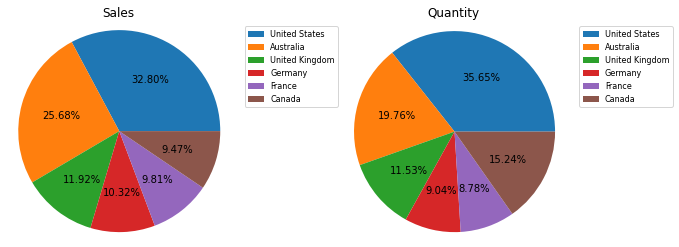

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 5 else ''

p,t,a = ax1.pie(Country_Sales.Revenue, autopct=autopct)
p,t,a = ax2.pie(Country_Sales.Order_Quantity, autopct=autopct)
ax1.axis('equal')
ax2.axis('equal')
# normalize dataframe (not actually needed here, but for general case)
normsizes = Country_Sales.Revenue/Country_Sales.Revenue.sum()*100
normsizes2 = Country_Sales.Order_Quantity/Country_Sales.Order_Quantity.sum()*100
# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Country_Sales.index.values,normsizes.values) if i > 5])
h,j = zip(*[(h,lab) for h,lab,i in zip(p,Country_Sales.index.values,normsizes2.values) if i > 5])

ax1.set_title('Sales')
ax2.set_title('Quantity')

ax1.legend(h, l,loc="best", bbox_to_anchor=(1.5,1), fontsize=8)
ax2.legend(h, j,loc="best", bbox_to_anchor=(1.5,1), fontsize=8)
plt.subplots_adjust(wspace = 0.5)

plt.show()
